# Author : Gaurav Haritas
## Task 2 : Prediction using Unsupervised Machine Learning

### GRIP @ The Sparks Foundation

In the given task, we are required to predict the optimum number of clusters and represent it visually from the given Iris dataset.

>Libraries used for the Task:
>  - Pandas
>  - Numpy
>  - ScikitLearn
>  - Scipy
>  - Matplotlib

##### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram

##### **Loading the dataset**

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

##### **Finding Optimum number of Clusters** 

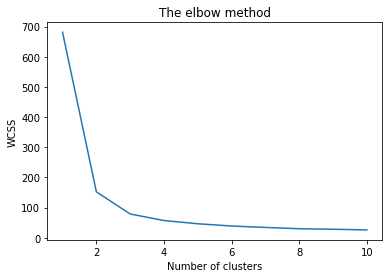

In [4]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter=300, n_init = 10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'the elbow'

plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

We can clearly see that the optimum number of clusters is where the elbow occurs. This is when within the cluster sum of squares(WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as '3'.

##### **Visualizing data and its hierarchy**

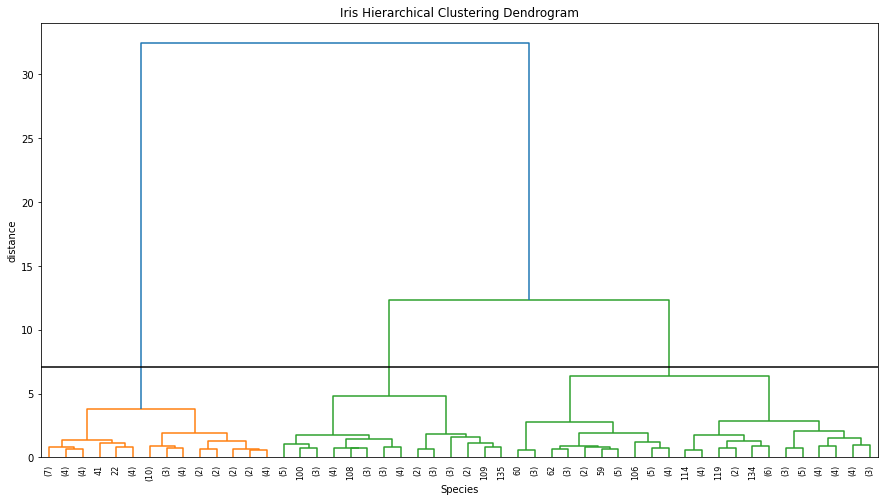

In [5]:
#Hierachy Clustering 
hier=linkage(x,"ward")
max_d=7.08
plt.figure(figsize=(15,8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    hier,
    truncate_mode='lastp',  
    p=50,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,     
)
plt.axhline(y=max_d, c='k')
plt.show()

##### **Data Preprocessing**

In [6]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


##### **Training the Model**

In [8]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [9]:
print(iris_k_mean_model.labels_)
print(iris_k_mean_model.cluster_centers_)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


##### **Visualizing the Model Clusters**

Text(0.5, 1.0, "Model's classification")

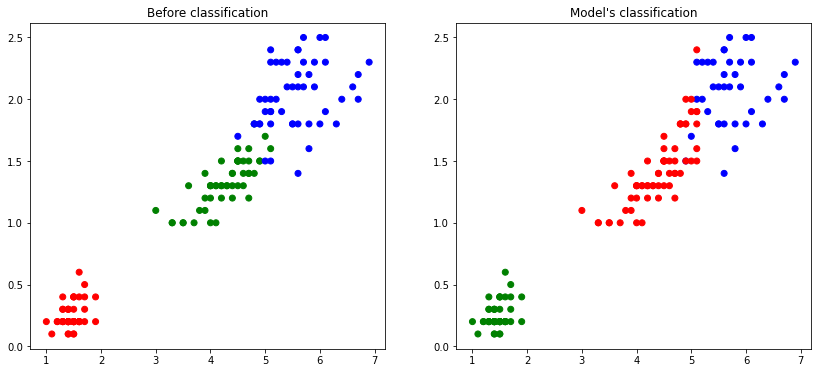

In [10]:
plt.figure(figsize=(14,6))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
# plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
# plt.legend(handles=[red_patch, green_patch, blue_patch])

##### **Calculating Accuracy and Confusion Matrix**

In [11]:
sm.accuracy_score(predictedY, y['Target'])

0.24

In [12]:
sm.confusion_matrix(predictedY, y['Target'])

array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]])

In a confusion matrix, the predicted class labels (0, 1, 2) are written along the top (column names). The true class labels (Iris-setosa, etc.) are written along the right side. Each cell in the matrix is a count of how many instances of a true class where classified as each of the predicted classes. 

#####  The Prediction using Unsupervised ML task has been successfully completed. The prediction was succesfully carried out and the model's clustering accuracy score was calculated.


# Thank You